In [16]:
import csv
import os
import pandas as pd

import csv

def read_measures():
    datos = []
    for i in range(1, 14):
        # Construimos el nombre del archivo
        archivo = f"mediciones/medicion{i}.csv"
        datos_archivo = []

        with open(archivo, 'r', newline='') as csvfile:
            csvreader = csv.reader(csvfile)
            next(csvreader)  # Omitir la primera fila

            for row in csvreader:
                datos_archivo.append(row)

        datos.append(datos_archivo)

    return datos

datos = read_measures()

#print(datos)
#print(len(datos))

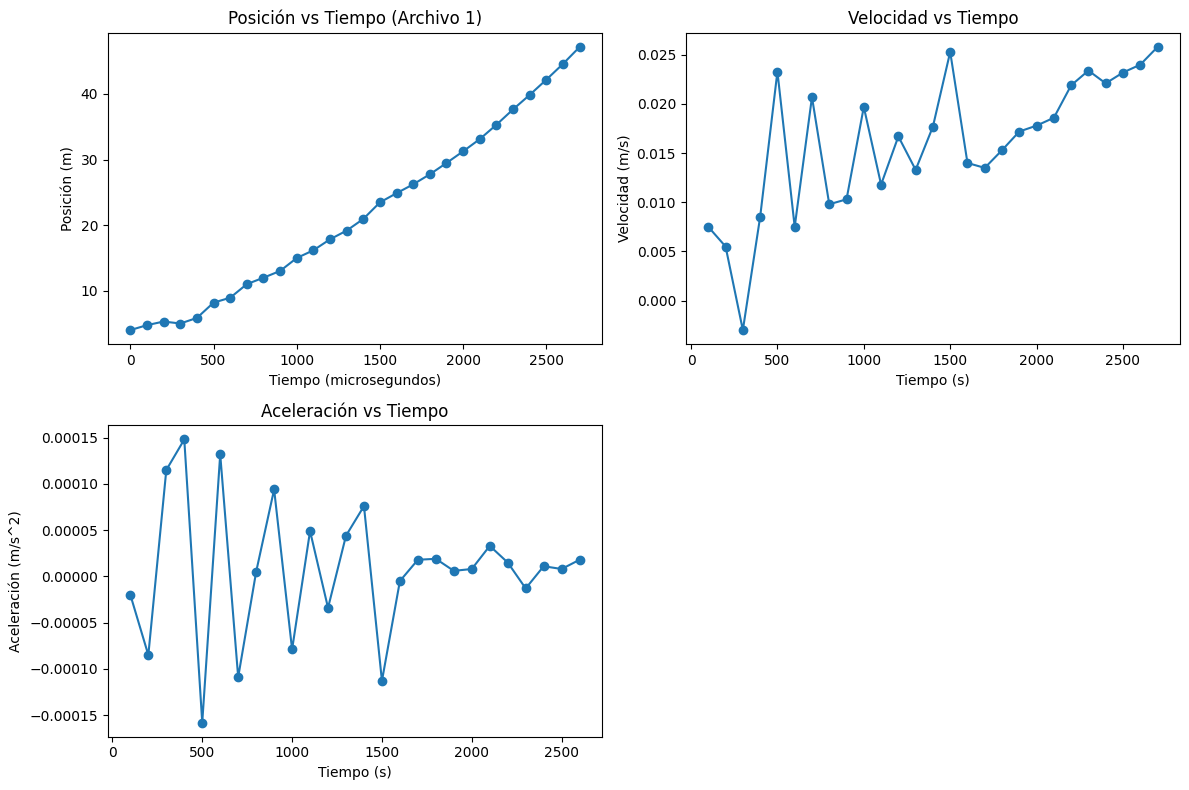

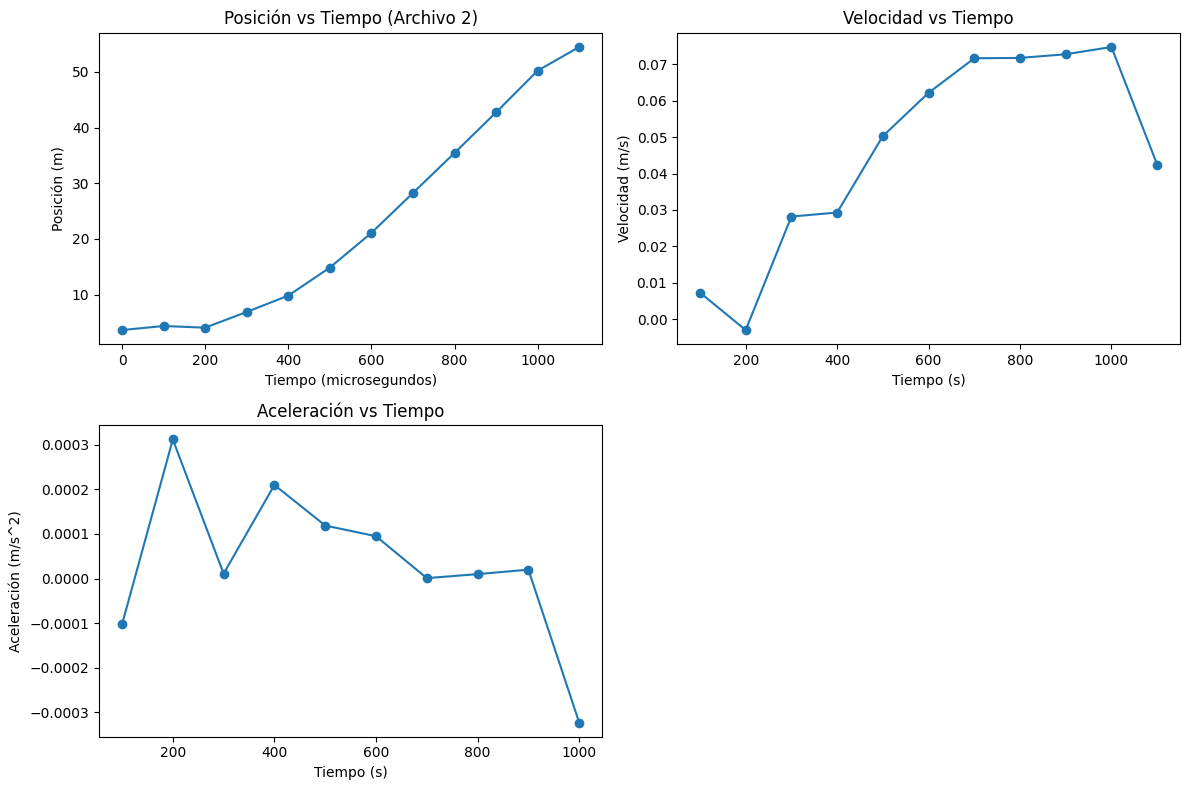

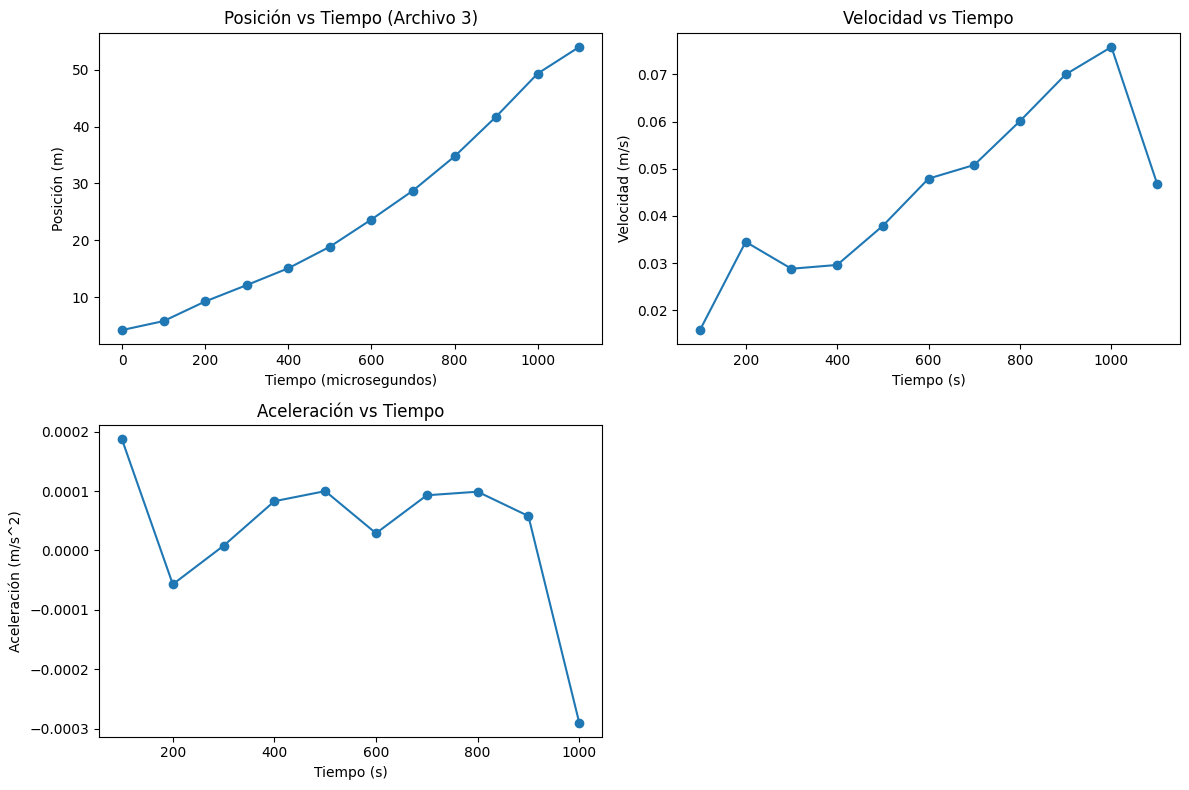

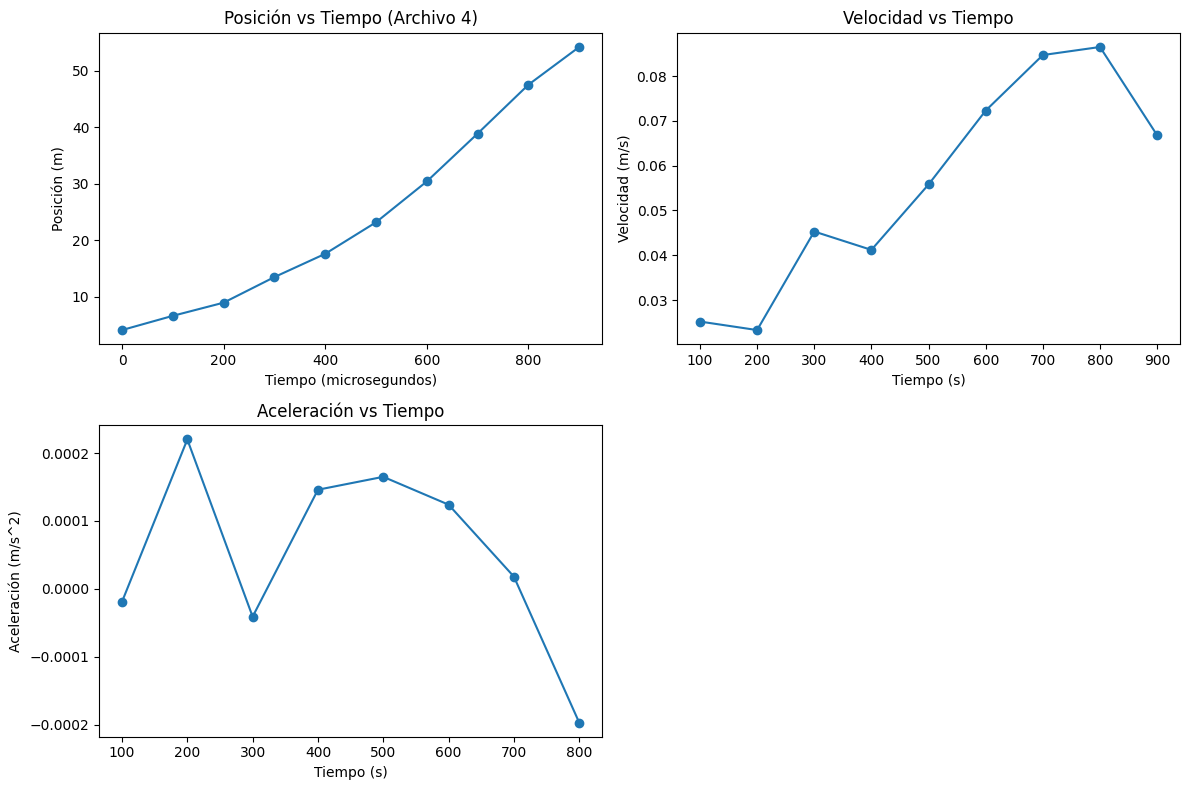

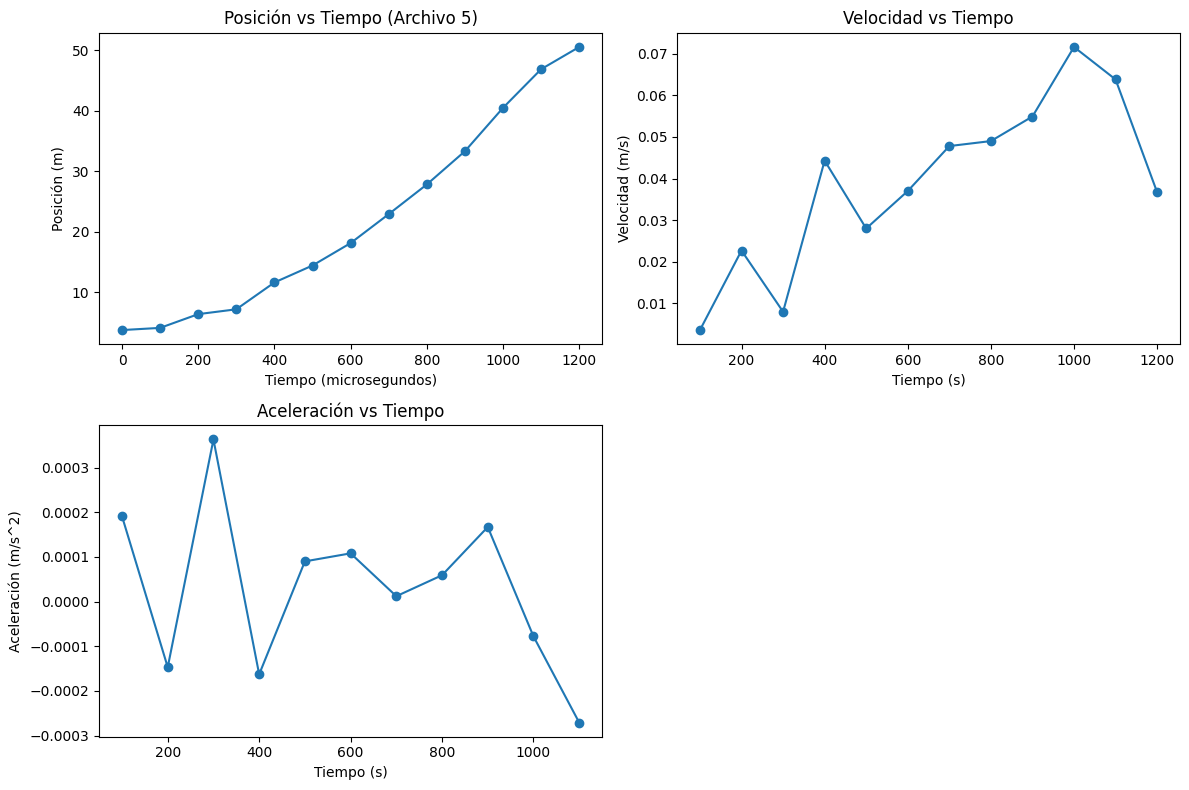

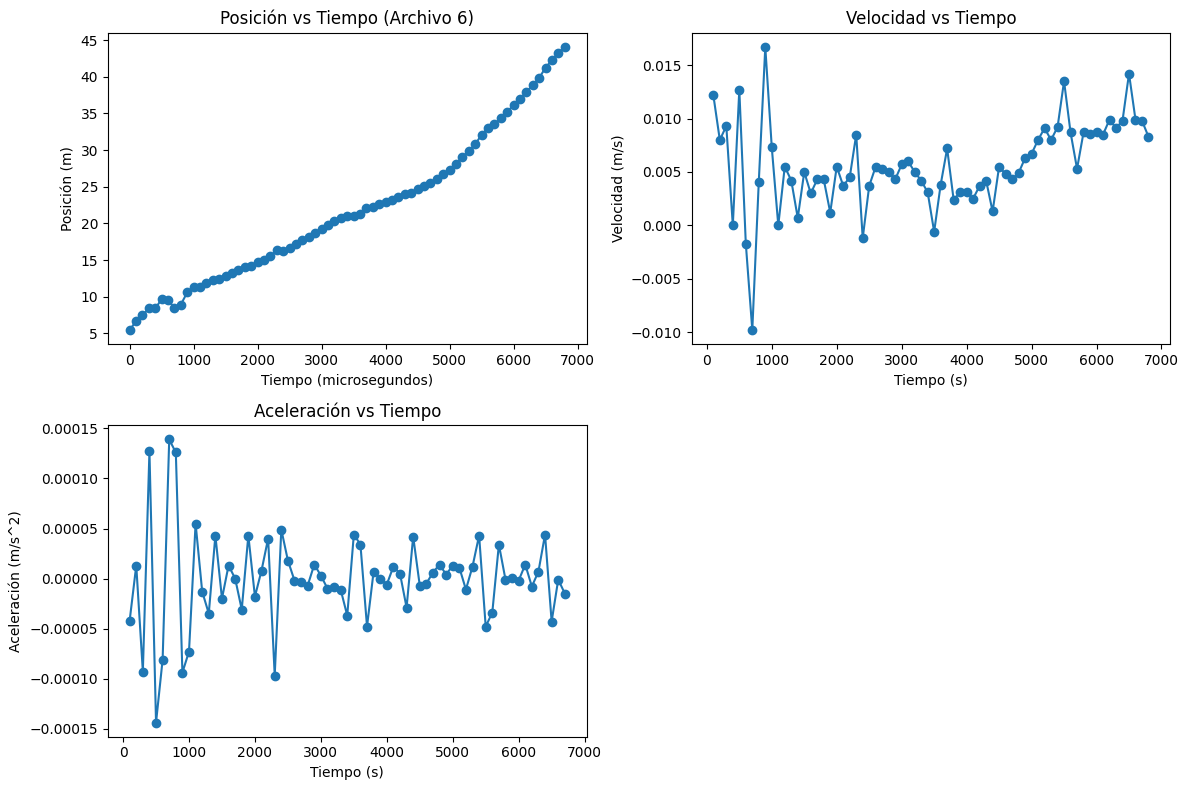

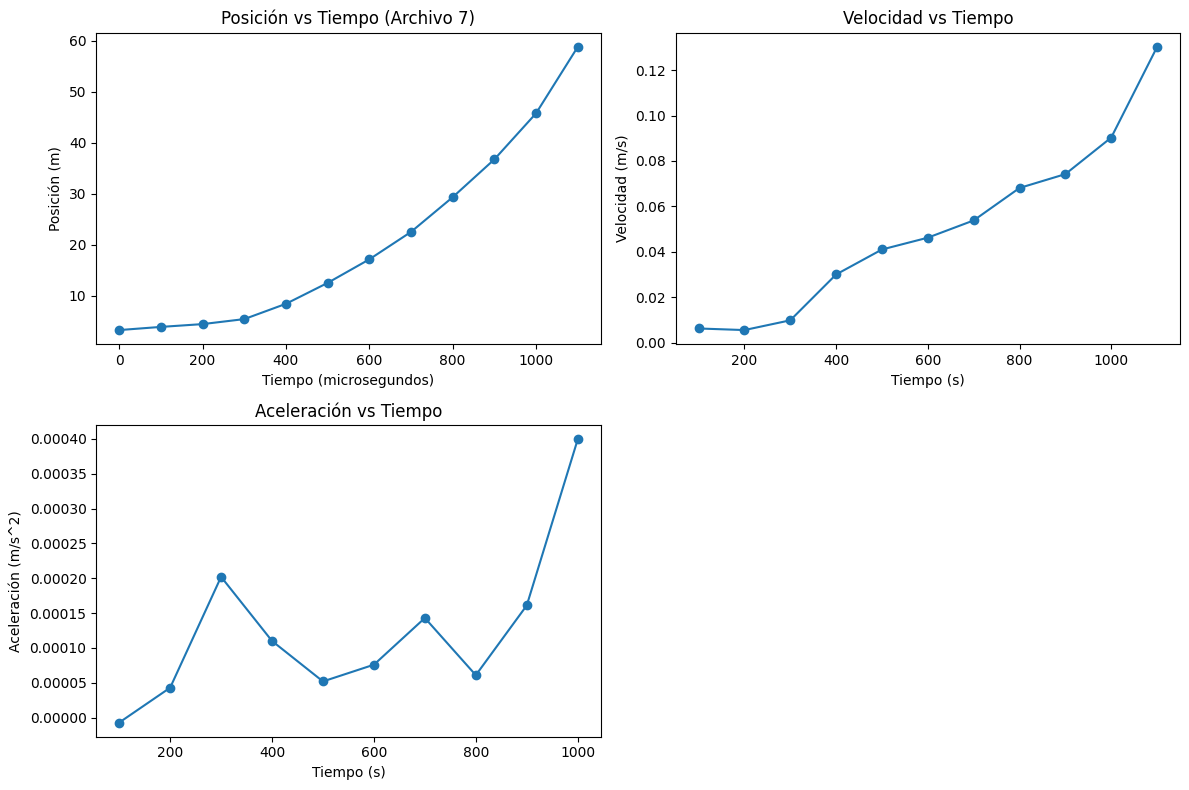

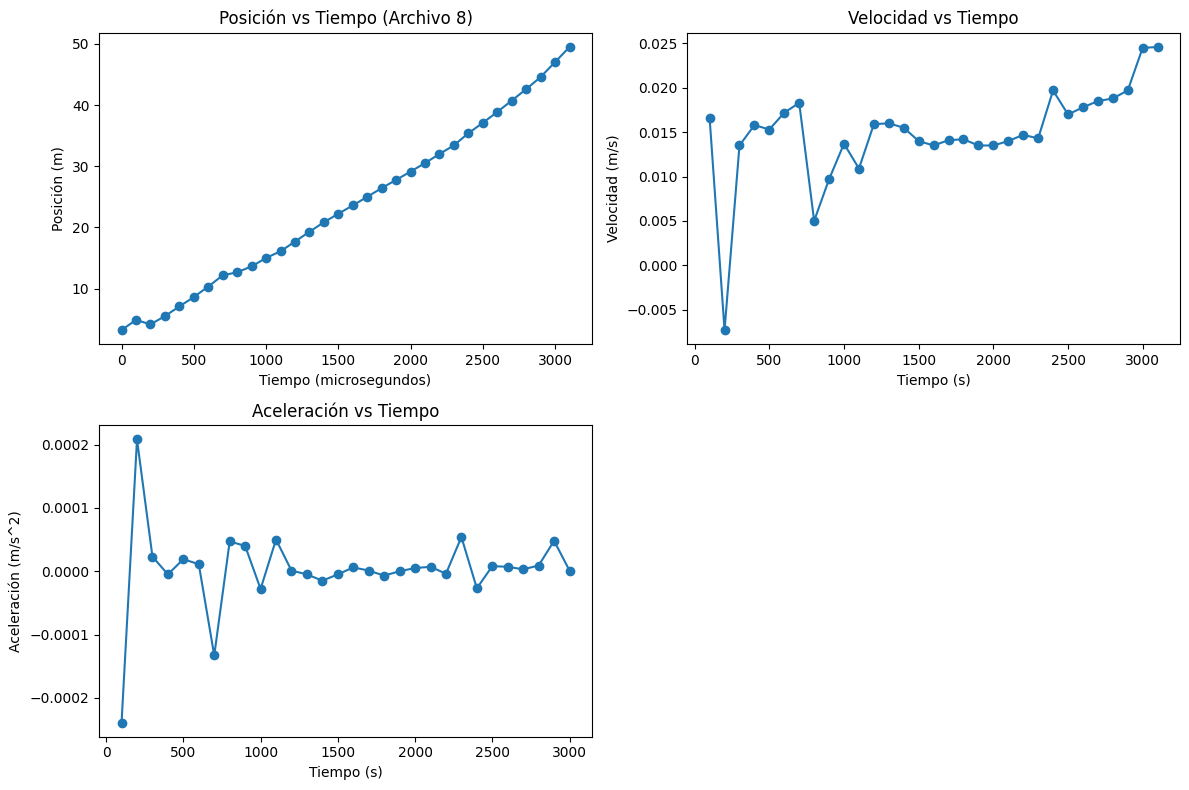

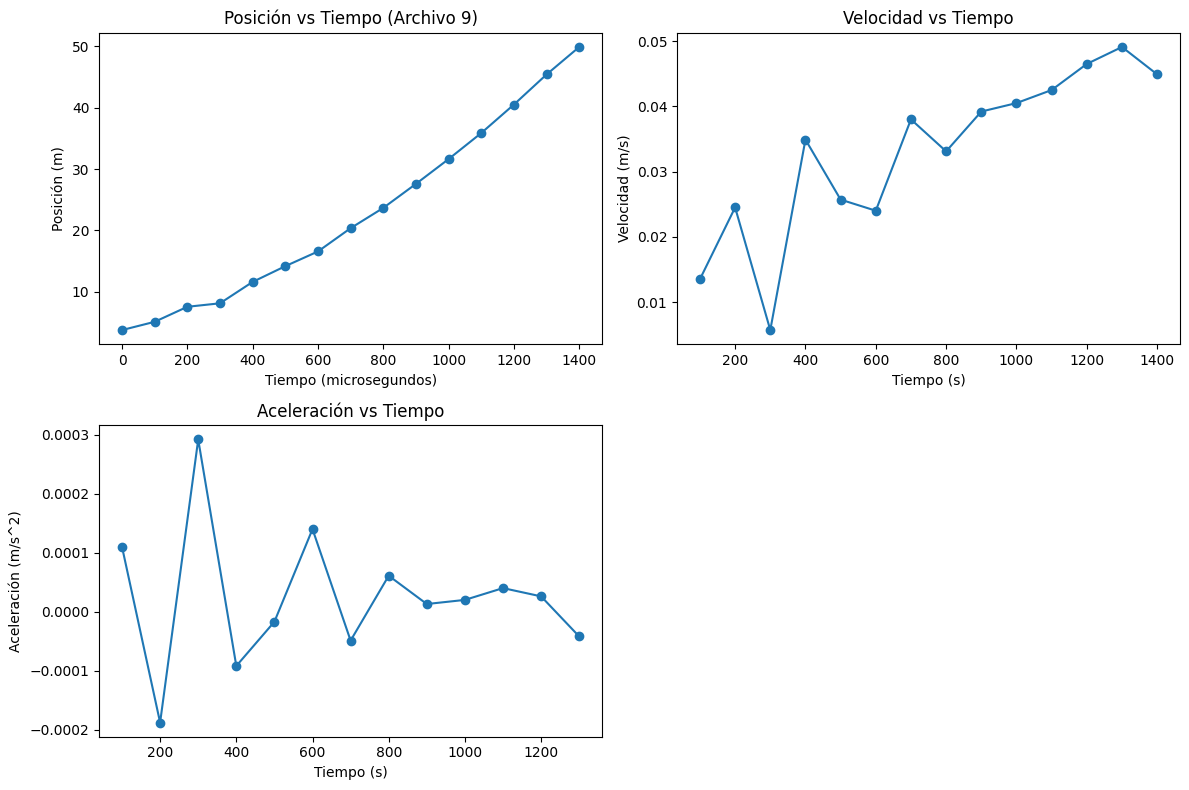

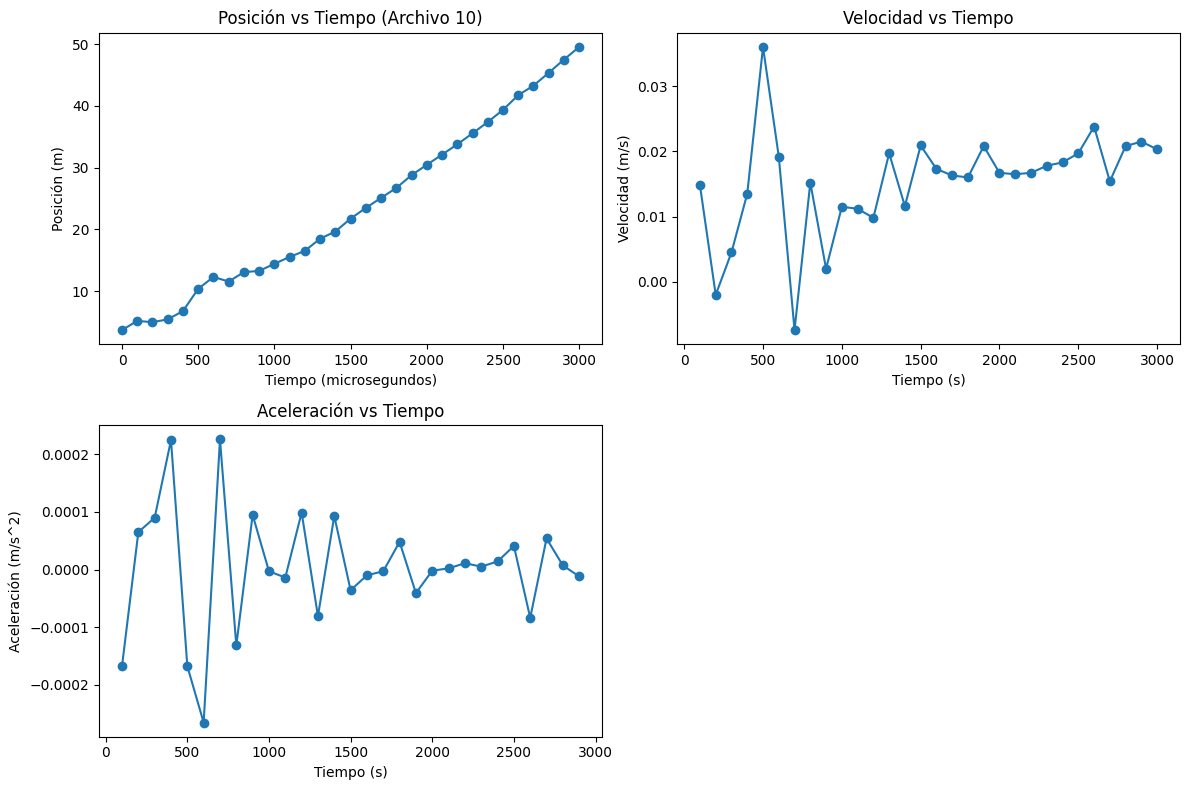

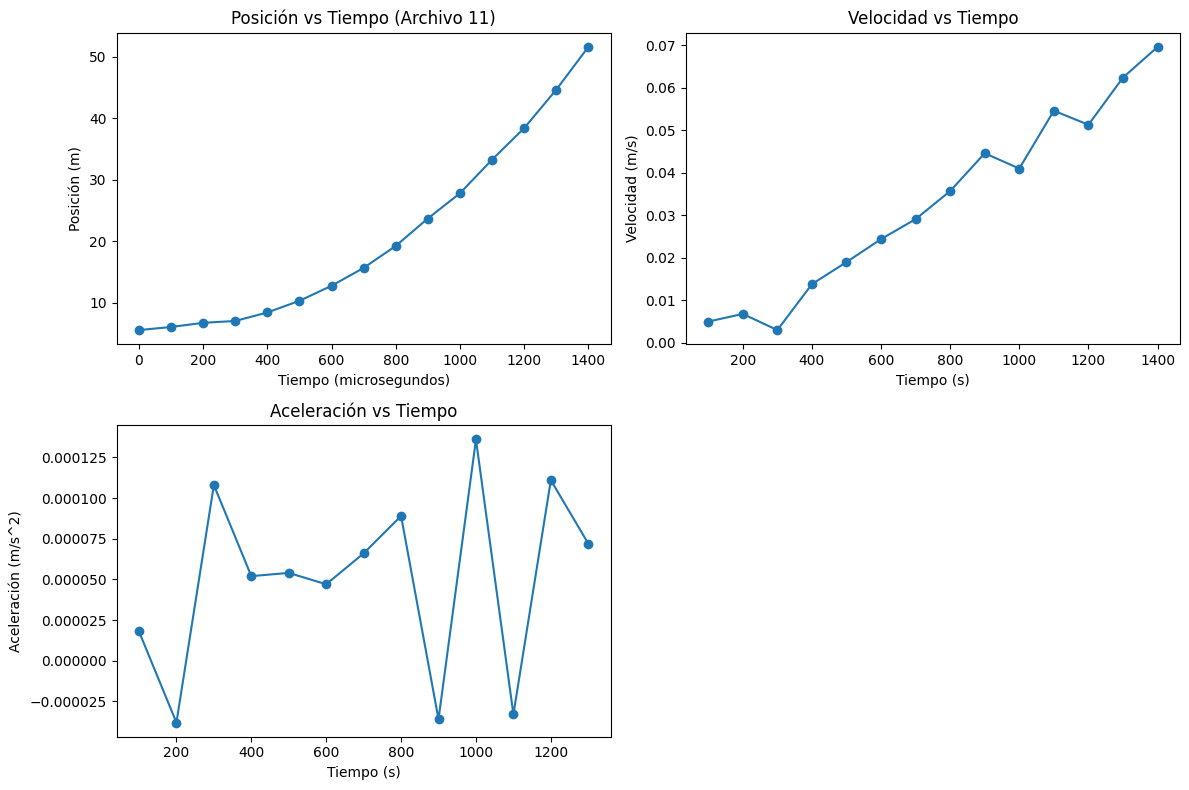

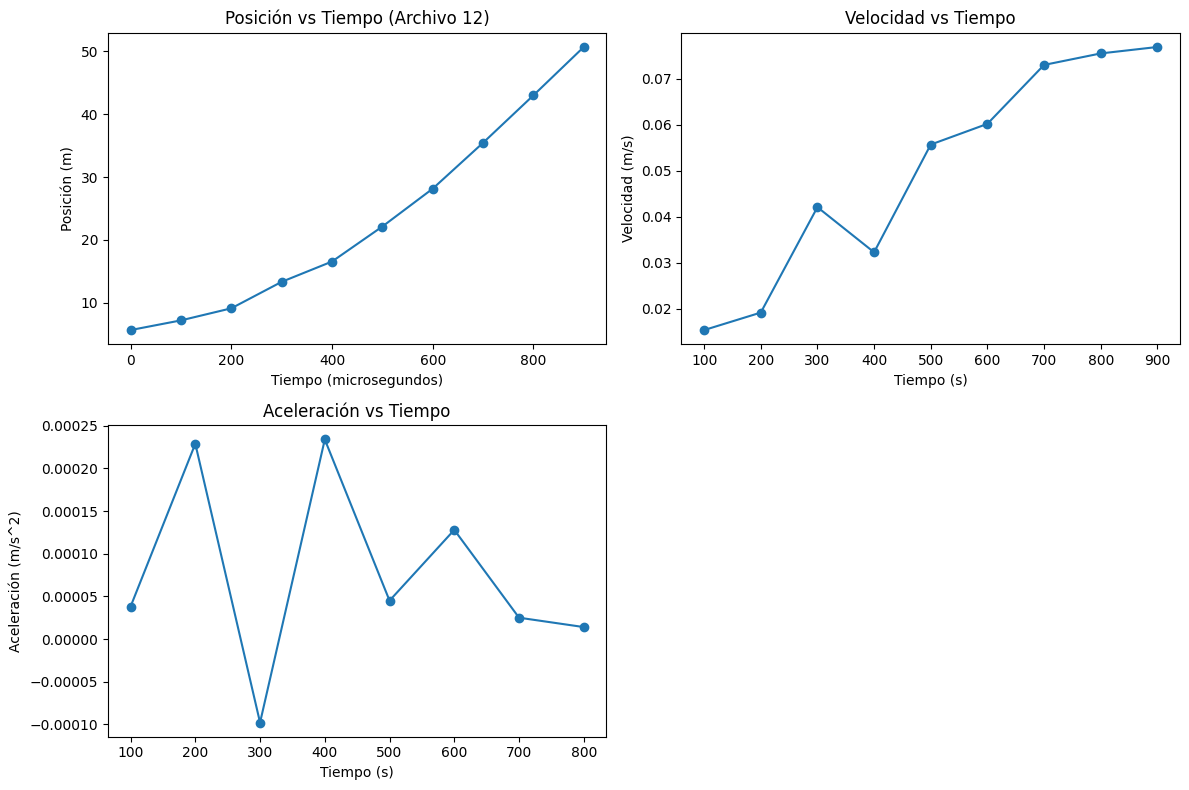

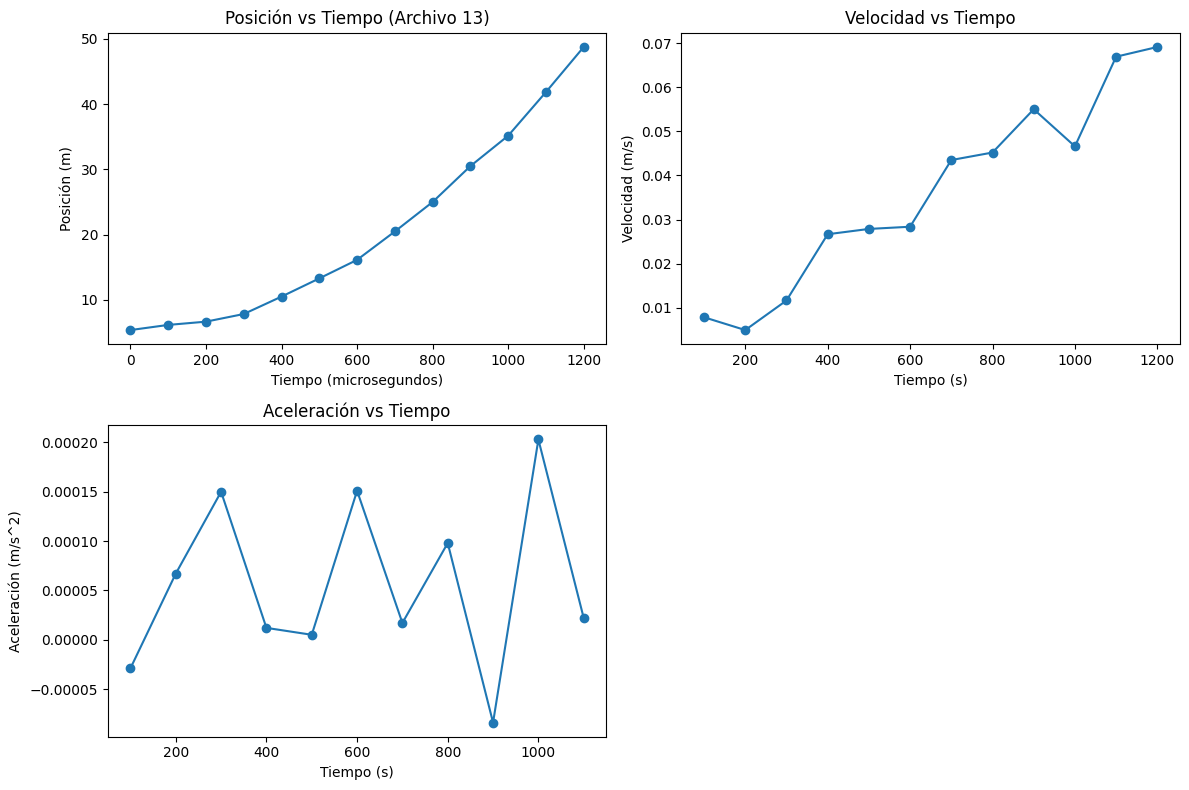

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes los siguientes datos de tiempo y posición
# (sustituye esto por tus datos reales)
#tiempos = np.array([0, 1, 2, 3, 4, 5])  # Tiempo en segundos
#posiciones = np.array([0, 1, 4, 9, 16, 25])  # Posición en metros

def p_v_a(datos):
    # Iteramos sobre cada conjunto de datos
    for i, datos_archivo in enumerate(datos):
        # Extraemos los tiempos y posiciones
        tiempos = [float(dato[0]) for dato in datos_archivo]
        posiciones = [float(dato[1]) for dato in datos_archivo]

        # Restamos el primer tiempo a todos los tiempos
        primer_tiempo = tiempos[0]
        tiempos = [t - primer_tiempo for t in tiempos]

        # Aquí puedes llamar a tu función con los tiempos y posiciones
        # Por ejemplo:
        calcular_y_graficar(tiempos, posiciones, i)

def calcular_y_graficar(tiempos, posiciones, i):
    # Calculamos las diferencias de tiempo y posición
    dt = np.diff(tiempos)
    dx = np.diff(posiciones)

    # Calculamos la velocidad como la razón de cambio de la posición respecto al tiempo
    velocidades = dx / dt

    # Calculamos la aceleración como la razón de cambio de la velocidad respecto al tiempo
    aceleraciones = np.diff(velocidades) / dt[:-1]

    # Ahora puedes graficar los resultados
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.title(f'Posición vs Tiempo (Archivo {i+1})')
    plt.plot(tiempos, posiciones, 'o-')
    #plt.title('Posición vs Tiempo')
    plt.xlabel('Tiempo (microsegundos)')
    plt.ylabel('Posición (cm)')

    plt.subplot(2, 2, 2)
    plt.plot(tiempos[1:], velocidades, 'o-')
    plt.title('Velocidad vs Tiempo')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Velocidad (cm/s)')

    plt.subplot(2, 2, 3)
    plt.plot(tiempos[1:-1], aceleraciones, 'o-')
    plt.title('Aceleración vs Tiempo')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Aceleración (cm/s^2)')

    plt.tight_layout()
    plt.show()

p_v_a(datos)